# MARATONA BEHIND THE CODE 2020

## DESAFIO 6 - LIT

### Desafio Desenvolvido por Cinthya Oestreich Silva

<hr>

## Installing Libs

In [1]:
!pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in c:\users\cinth\anaconda3\envs\ml\lib\site-packages (0.23.2)


In [2]:
!pip install xgboost --upgrade

Requirement already up-to-date: xgboost in c:\users\cinth\anaconda3\envs\ml\lib\site-packages (1.2.0)


In [3]:
!pip install imblearn --upgrade

Requirement already up-to-date: imblearn in c:\users\cinth\anaconda3\envs\ml\lib\site-packages (0.0)


<hr>

In [4]:
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network  import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

## Download dos conjuntos de dados em formato .csv

In [8]:
#!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/training_dataset.csv
df_training_dataset = pd.read_csv(r'training_dataset.csv')
df_training_dataset.tail()

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
15852,620397030.0,Bacharelado,UFF,Outros,Borracha,0.0,0.0,1.0,8.0,NaN,10.0,NaN,NaN,NaN,perfil6
15853,229931283.0,Bacharelado,NaN,Advogado,NaN,0.0,0.0,1.0,7.0,Linkedin,42.0,17.0,15.0,NaN,perfil5
15854,480674907.0,Tecnólogo,UNIP,Sócio/Dono/Proprietário,NaN,0.0,NaN,1.0,7.0,Outros,30.0,9.0,8.0,0.0,perfil5
15855,559626807.0,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Advogado,Estado,0.0,0.0,1.0,10.0,NaN,226.0,102.0,93.0,1.0,perfil1
15856,743652801.0,NaN,FGV-RJ,NaN,Siderurgica,1.0,1.0,1.0,9.0,Outros,125.0,98.0,97.0,1.0,perfil1


Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os usuários da plataforma:

**id**

**graduacao**

**universidade**

**profissao**

**organizacao**

**pretende_fazer_cursos_lit**

**interesse_mba_lit**

**importante_ter_certificado**

**horas_semanais_estudo**

**como_conheceu_lit**

**total_modulos**

**modulos_iniciados**

**modulos_finalizados**

**certificados**

**categoria**

In [9]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15857 entries, 0 to 15856
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          13945 non-null  float64
 1   graduacao                   13950 non-null  object 
 2   universidade                13920 non-null  object 
 3   profissao                   13977 non-null  object 
 4   organizacao                 13961 non-null  object 
 5   pretende_fazer_cursos_lit   13989 non-null  float64
 6   interesse_mba_lit           14003 non-null  float64
 7   importante_ter_certificado  13918 non-null  float64
 8   horas_semanais_estudo       13959 non-null  float64
 9   como_conheceu_lit           13915 non-null  object 
 10  total_modulos               13987 non-null  float64
 11  modulos_iniciados           14044 non-null  float64
 12  modulos_finalizados         13924 non-null  float64
 13  certificados                139

In [10]:
df_training_dataset.nunique()

id                            13945
graduacao                         6
universidade                     21
profissao                        12
organizacao                      11
pretende_fazer_cursos_lit         2
interesse_mba_lit                 2
importante_ter_certificado        1
horas_semanais_estudo             9
como_conheceu_lit                 9
total_modulos                   578
modulos_iniciados               372
modulos_finalizados             339
certificados                     23
categoria                         6
dtype: int64

## Pre-processando o dataset antes do treinamento

### Removendo todas as linhas que possuem algum valor nulos em determinadas colunas

Usando o método Pandas **DataFrame.dropna()** você pode remover todas as linhas nulas do dataset.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [11]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [12]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação DropNA: 

id                            1912
graduacao                     1907
universidade                  1937
profissao                     1880
organizacao                   1896
pretende_fazer_cursos_lit     1868
interesse_mba_lit             1854
importante_ter_certificado    1939
horas_semanais_estudo         1898
como_conheceu_lit             1942
total_modulos                 1870
modulos_iniciados             1813
modulos_finalizados           1933
certificados                  1878
categoria                        0
dtype: int64



In [13]:
# Aplicando a função para deletar todas as linhas com valor NaN na coluna ``certificados'' e ``total_modulos'':
df_training_dataset = df_training_dataset.dropna(axis='index', how='any', subset=['certificados', 'total_modulos'])

In [14]:
# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset após a transformação DropNA: 

id                            1482
graduacao                     1488
universidade                  1486
profissao                     1454
organizacao                   1482
pretende_fazer_cursos_lit     1484
interesse_mba_lit             1448
importante_ter_certificado    1499
horas_semanais_estudo         1472
como_conheceu_lit             1485
total_modulos                    0
modulos_iniciados             1417
modulos_finalizados           1476
certificados                     0
categoria                        0
dtype: int64



### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [15]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

id                            1482
graduacao                     1488
universidade                  1486
profissao                     1454
organizacao                   1482
pretende_fazer_cursos_lit     1484
interesse_mba_lit             1448
importante_ter_certificado    1499
horas_semanais_estudo         1472
como_conheceu_lit             1485
total_modulos                    0
modulos_iniciados             1417
modulos_finalizados           1476
certificados                     0
categoria                        0
dtype: int64

Valores nulos no df_training_dataset após a transformação SimpleImputer: 

id                            0
graduacao                     0
universidade                  0
profissao                     0
organizacao                   0
pretende_fazer_cursos_lit     0
interesse_mba_lit             0
importante_ter_certificado    0
horas_semanais_estudo         0
como_conheceu_lit    

### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [16]:
df_training_dataset_imputed.tail()

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
12324,722542433.0,Bacharelado,0,Engenheiro,servicos,1.0,1.0,1.0,6.0,Outros,515.0,166.0,102.0,0.0,perfil4
12325,931753956.0,SEM FORMAÇÃO,UFRN,Supervisor,Siderurgica,0.0,0.0,1.0,8.0,Instagram,54.0,37.0,31.0,0.0,perfil2
12326,480674907.0,Tecnólogo,UNIP,Sócio/Dono/Proprietário,0,0.0,0.0,1.0,7.0,Outros,30.0,9.0,8.0,0.0,perfil5
12327,559626807.0,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Advogado,Estado,0.0,0.0,1.0,10.0,0,226.0,102.0,93.0,1.0,perfil1
12328,743652801.0,0,FGV-RJ,0,Siderurgica,1.0,1.0,1.0,9.0,Outros,125.0,98.0,97.0,1.0,perfil1


In [17]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['id', 'graduacao', 'universidade', 'organizacao', 'como_conheceu_lit','profissao','importante_ter_certificado'], inplace=False)

In [18]:
df_training_dataset_rmcolumns.tail()


,pretende_fazer_cursos_lit,interesse_mba_lit,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
12324,1.0,1.0,6.0,515.0,166.0,102.0,0.0,perfil4
12325,0.0,0.0,8.0,54.0,37.0,31.0,0.0,perfil2
12326,0.0,0.0,7.0,30.0,9.0,8.0,0.0,perfil5
12327,0.0,0.0,10.0,226.0,102.0,93.0,1.0,perfil1
12328,1.0,1.0,9.0,125.0,98.0,97.0,1.0,perfil1


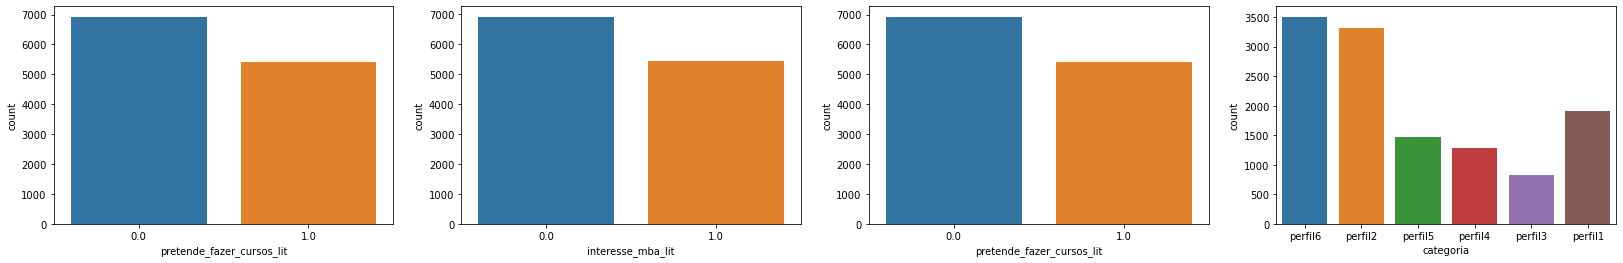

In [20]:
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(28, 4))

sns.countplot(ax=axes[0], x='pretende_fazer_cursos_lit', data=df_training_dataset_rmcolumns)
sns.countplot(ax=axes[1], x='interesse_mba_lit', data=df_training_dataset_rmcolumns)
sns.countplot(ax=axes[2], x='pretende_fazer_cursos_lit', data=df_training_dataset_rmcolumns)
sns.countplot(ax=axes[3], x='categoria', data=df_training_dataset_rmcolumns)

<hr>

## Treinando varios classificadores

### Selecionando FEATURES e definindo a variável TARGET

In [21]:
df_training = df_training_dataset_rmcolumns
df_training.columns

Index(['pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'horas_semanais_estudo', 'total_modulos', 'modulos_iniciados',
       'modulos_finalizados', 'certificados', 'categoria'],
      dtype='object')

In [22]:
features = df_training[
    [
        'pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'horas_semanais_estudo', 'total_modulos', 'modulos_iniciados',
       'modulos_finalizados', 'certificados'
    ]
]
target = df_training['categoria']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste


### Aplicando o Smote na base de treinamento. Lembrando se sempre preservar a base X e Y de teste.


In [23]:
from sklearn.model_selection import train_test_split
#Smote
import imblearn
from imblearn.over_sampling import SMOTE

X_train2, X_test, y_train2, y_test = train_test_split(features, target, test_size=0.3, random_state=133)

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train2, y_train2)

### Treinando uma árvore de decisão

In [24]:
import random 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn import svm, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network  import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix


#dtc = DecisionTreeClassifier(max_depth=15).fit(X_train, y_train)

rng = np.random.RandomState(123)

lr = LogisticRegression(C=1e5,solver='lbfgs',max_iter = 500)
dt =  DecisionTreeClassifier(criterion='entropy')
knn = KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
 metric_params=None, n_jobs=1, n_neighbors=6, p=2,
 weights='uniform')
mlp = MLPClassifier(solver='sgd', early_stopping=True, hidden_layer_sizes=(1000), activation='logistic', batch_size=100, max_iter=10000, learning_rate_init=0.1, momentum=0.2, tol=1e-10, random_state=rng)
nb = GaussianNB(var_smoothing=1e-09)

# Define ensembles
#rf = RandomForestClassifier(criterion ='entropy', min_samples_split = 6, n_estimators=100, random_state=0)
#rf = RandomForestClassifier(max_features = 'auto', criterion ='entropy', min_samples_split = 6, n_estimators=100, random_state=50, oob_score = True)
rf = RandomForestClassifier(max_features = 'auto',criterion ='entropy', n_estimators=1000)


# parameters for SVM

svc = svm.SVC(kernel='linear')

xgb = XGBClassifier(objective="binary:logistic", random_state=42)
'''
xgb = XGBClassifier(  learning_rate=0.1,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=6, 
                      gamma=10,
                      min_child_weight=1)'''
# antes max_depht = 4
cb = VotingClassifier(estimators=[('RandonFlorest', rf), ('Xboost', xgb)], voting='soft')

titles = ['LogisticRegresson', 'DecisionTree', 'KNN', 'RF', 'RF+XGB' , 'xgb' ]
methods = [lr, dt, knn, rf, cb ,xgb]

### Fazendo previsões na amostra de teste

In [25]:
scores = []
for method, name in zip(methods, titles):
    method.fit(X_train, y_train)
    scores.append(method.score(X_test, y_test))
    print("Classification accuracy {} = {}"
          .format(name, method.score(X_test, y_test)))

C:\Users\cinth\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Classification accuracy LogisticRegresson = 0.6193565828602325
Classification accuracy DecisionTree = 0.6723438767234388
Classification accuracy KNN = 0.5998918626655853
Classification accuracy RF = 0.7975128413084618
Classification accuracy RF+XGB = 0.8102189781021898
Classification accuracy xgb = 0.8094079480940795


### Analisando a qualidade do modelo através da matriz de confusão

LogisticRegresson
                 1         2         3         4         5         6
F1-Score  0.760331  0.714685  0.370968  0.332335  0.323492  0.722154
Precisão  0.831325  0.794045  0.312500  0.381443  0.391304  0.625884
Recall    0.700508  0.649746  0.456349  0.294430  0.275711  0.853423


DecisionTree
                 1         2         3         4         5         6
F1-Score  0.672897  0.702837  0.562992  0.609854  0.628445  0.711632
Precisão  0.675768  0.689453  0.558594  0.612299  0.633333  0.721506
Recall    0.670051  0.716751  0.567460  0.607427  0.623632  0.702025


KNN
                 1         2         3         4         5         6
F1-Score  0.441065  0.574958  0.538226  0.576923  0.638207  0.742620
Precisão  0.400552  0.643216  0.437811  0.558313  0.622917  0.802013
Recall    0.490694  0.519797  0.698413  0.596817  0.654267  0.691418


RF
                 1         2         3         4         5         6
F1-Score  0.802395  0.821074  0.751515  0.753004  0.766004 

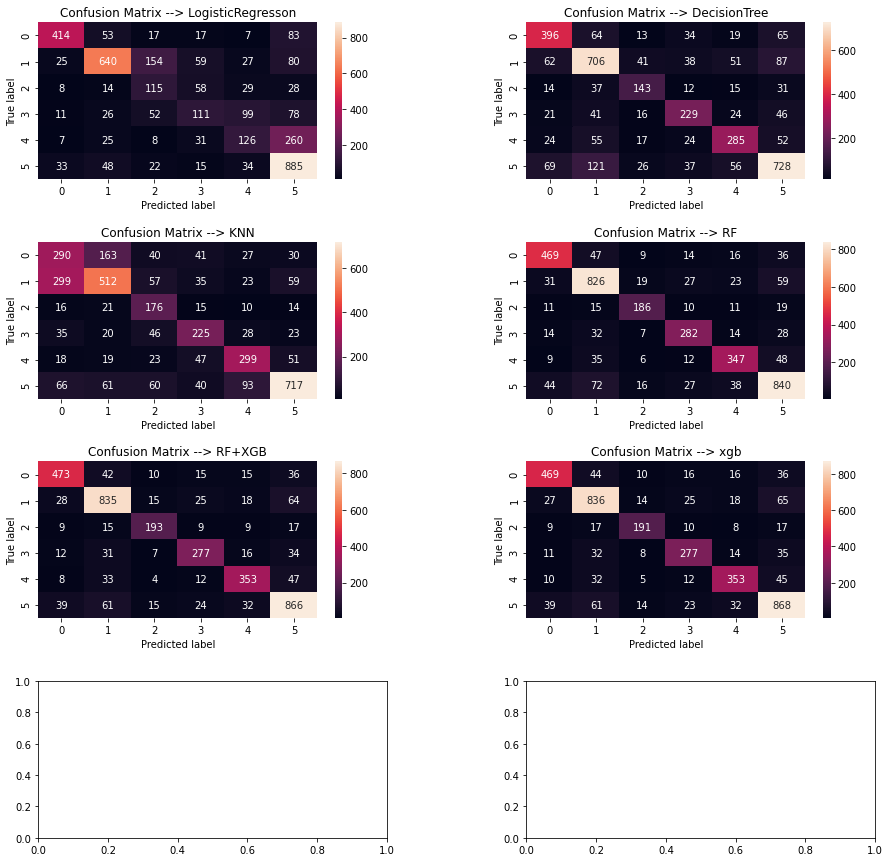

<Figure size 432x288 with 0 Axes>

In [26]:
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import itertools


fig3, sub1 = plt.subplots(4, 2, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
class_names=['1','2', '3','4','5','6' ] 
for clf, ax, title in zip(methods, sub1.flatten(), titles):
    y_predicted = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predicted)
    #plot_confusion_matrix(ax, cm, title)
    df_cm = pd.DataFrame(cm, index = [i for i in "012345"],
                  columns = [i for i in "012345"])
    sns.heatmap(df_cm, annot=True, ax=ax, fmt = 'd')
    ax.set_title('Confusion Matrix --> ' + title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fScore = f1_score(y_test, y_predicted ,average=None)
    precision = precision_score(y_test, y_predicted ,average=None)
    recall = recall_score(y_test, y_predicted ,average=None)
    
    numpy_data = np.array([fScore,precision,recall]) 
    df = pd.DataFrame(data=numpy_data, index=["F1-Score", "Precisão","Recall"], columns = class_names)
    print(title )
    print(df)
    print('\n')

plt.show()
plt.tight_layout()

<hr>

## Neste caso foi possivel observar o melhor modelo seria o ensemble com o Random Forest e Xboost. 

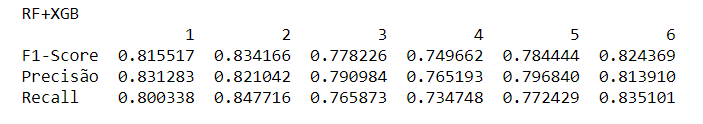
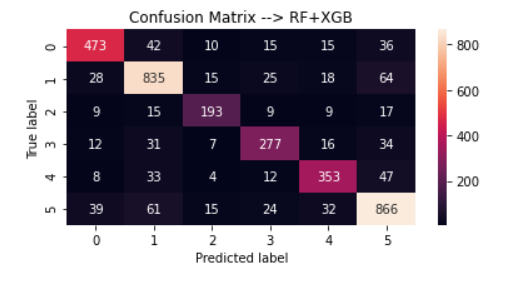

### Como este caso era de classificação por classes utilizei números ao invés dos nomes das classes nas análises. 



## Scoring dos dados necessários para entregar a solução
### Abaixo segue o código para entrega do desafio

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [36]:
#!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados
995,741745189,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Coordenador,Borracha,0,0,1,2,YouTube,245,63,45,1
996,996387882,Bacharelado,UFRN,Assessor,Estado,1,1,1,8,Google,163,111,96,0
997,668869418,Bacharelado,UFSCar,Gerente,Siderurgica,1,1,1,9,Facebook,56,10,4,0
998,676531718,Tecnólogo,FATEC,Outros,servicos,1,1,1,9,Mídia (revista/jornal/web),138,60,30,0
999,388402340,Especialização,UNIP,Advogado,Montadora,0,0,1,9,Mídia (revista/jornal/web),22,20,19,0


In [37]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          1000 non-null   int64 
 1   graduacao                   1000 non-null   object
 2   universidade                1000 non-null   object
 3   profissao                   1000 non-null   object
 4   organizacao                 1000 non-null   object
 5   pretende_fazer_cursos_lit   1000 non-null   int64 
 6   interesse_mba_lit           1000 non-null   int64 
 7   importante_ter_certificado  1000 non-null   int64 
 8   horas_semanais_estudo       1000 non-null   int64 
 9   como_conheceu_lit           1000 non-null   object
 10  total_modulos               1000 non-null   int64 
 11  modulos_iniciados           1000 non-null   int64 
 12  modulos_finalizados         1000 non-null   int64 
 13  certificados                1000 non-null   int64

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [38]:
# 1 - Removendo linhas com valores NaN em "certificados" e "total_modulos"
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['certificados', 'total_modulos'])

# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoção de colunas
df_to_be_scored_4 = df_to_be_scored_2.drop(columns=['id', 'graduacao', 'universidade', 'organizacao', 'como_conheceu_lit','profissao','importante_ter_certificado'], inplace=False)

# 4 - Encoding com "dummy variables"
#df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['profissao'])

df_to_be_scored_4.tail()

,pretende_fazer_cursos_lit,interesse_mba_lit,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados
995,0,0,2,245,63,45,1
996,1,1,8,163,111,96,0
997,1,1,9,56,10,4,0
998,1,1,9,138,60,30,0
999,0,0,9,22,20,19,0


<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [39]:
df_training[
    [
        'pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'horas_semanais_estudo', 'total_modulos', 'modulos_iniciados',
       'modulos_finalizados', 'certificados'
    ]
].columns

Index(['pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'horas_semanais_estudo', 'total_modulos', 'modulos_iniciados',
       'modulos_finalizados', 'certificados'],
      dtype='object')

In [40]:
df_to_be_scored_4.columns

Index(['pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'horas_semanais_estudo', 'total_modulos', 'modulos_iniciados',
       'modulos_finalizados', 'certificados'],
      dtype='object')

# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [41]:
#df_to_be_scored_4['profissao_0'] = 0

In [42]:
y_pred = cb.predict(df_to_be_scored_4)
df_to_be_scored_4['target'] = y_pred
df_to_be_scored_4.tail()

,pretende_fazer_cursos_lit,interesse_mba_lit,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados,target
995,0,0,2,245,63,45,1,perfil1
996,1,1,8,163,111,96,0,perfil2
997,1,1,9,56,10,4,0,perfil6
998,1,1,9,138,60,30,0,perfil2
999,0,0,9,22,20,19,0,perfil3


### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [43]:
#project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))

df_to_be_scored_4.to_csv("results.csv")


# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://lit.maratona.dev
